In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
s = np.array([40e-3, 112e-3, 200e-3, 272e-3, 440e-3, 608e-3, 816e-3, 1.06, 1.39, 1.82, 2.32, 2.80, 3.38])

V = np.array([3.63, 3.23, 2.81, 2.49, 1.93, 1.51, 1.10, 770e-3, 510e-3, 290e-3, 170e-3, 130e-3, 90e-3])

V_Vo = V / 4


In [5]:
def exp_fit(t, A, D):
    return A * np.exp(-D * t)


In [11]:
pars, cov = opt.curve_fit(exp_fit, s, V_Vo)

[A, D] = pars
errs = np.sqrt(np.diag(cov))
[A_err, D_err] = errs

V_Vo_pred = exp_fit(np.linspace(0,3.5), A, D)



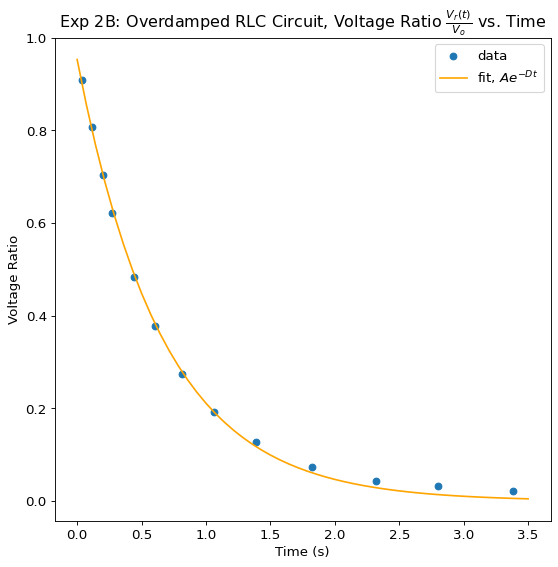

In [17]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(s, V_Vo, label="data")
plt.plot(np.linspace(0,3.5), V_Vo_pred, color='orange', label=r'fit, $A e^{-D t}$')

plt.title(r"Exp 2B: Overdamped RLC Circuit, Voltage Ratio $\frac{V_r(t)}{V_o}$ vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Voltage Ratio")

plt.legend(loc=1)
plt.show()



In [13]:
errs

array([0.00861471, 0.02804985])

In [14]:
pars

array([0.95269888, 1.50709399])